In [167]:
import numpy as np
from matplotlib import pyplot as plt

In [168]:
pi = np.pi

# cylindrical buoy
rho = 1000.0
g = 10.0
D = 0.1

# period
Tn = 1
wn = 2.0*pi/Tn
print("wn = %6.4f"%wn)

# damping
xi = 0.05
wD = wn*pow(1-xi*xi, 0.5)

# parameter
A = 0.25*D*D*pi*pi
k = rho*g*A
m = k*Tn*Tn/(4.0*pi*pi)
print("weight = %6.4f (N)"%(m*g))

# external force
w = 1.0*wn
if (w == wn):
    print("resonance, w = wn")
ao = g
usto = m*ao/k

wn = 6.2832
weight = 62.5000 (N)
resonance, w = wn


In [169]:
# initial condition
uo = 0.0
vo = 0.0

c1 = uo + (m*ao/k)*(-2.0*xi*(w/wn))/(pow(1-pow(w/wn, 2), 2) + pow(2.0*xi*(w/wn), 2))
c2 = vo/wD + xi*wn*c1/wD - (w*m*ao/(k*wD))*(1-pow(w/wn, 2))/(pow(1-pow(w/wn, 2), 2) + pow(2.0*xi*(w/wn), 2))

# displavement
def u(t):
    disp = (-2.0*xi*(w/wn))*np.cos(w*t) + (1-pow(w/wn, 2))*np.sin(w*t)
    disp *= (1/(pow(1-pow(w/wn, 2), 2) + pow(2.0*xi*(w/wn), 2)))
    disp *= (m*ao/k)
#     disp += np.exp(-xi*wn*t)*(c1*np.cos(wD*t) + c2*np.sin(wD*t))
    return disp

In [170]:
EndTime = 20.0
tns = np.arange(0, EndTime+1e-10, min([0.1*Tn, 2.0*pi/w]))
t_len = len(tns)
uns = np.zeros(t_len)
MAX_UNS = uns[0]
for i in range(t_len):
    t = tns[i]
    uns[i] = u(t)
MAX_UNS = max(np.abs(uns))
print("fB = %6.4f"%(rho*g*A*MAX_UNS))
print("height = %6.4f"%MAX_UNS)

fB = 625.0000
height = 2.5330


In [171]:
# h.w. -> Ans
MAX_VAL = m*ao/k*(1/(2*xi))
print("Max Value = %6.4f"%MAX_VAL)
print("fB = %6.4f"%(rho*g*A*MAX_VAL))

Max Value = 2.5330
fB = 625.0000


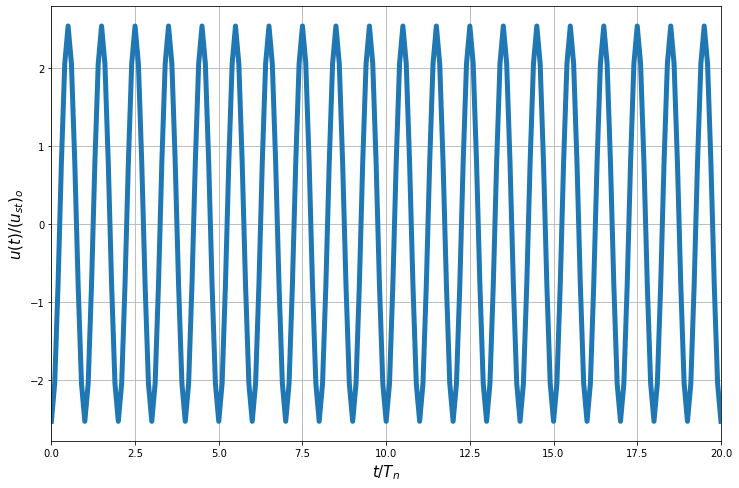

In [172]:
plt.figure(figsize=(12, 8))
plt.plot(tns, uns, lw=5, color="tab:blue")
plt.xlim(0, EndTime/Tn)
plt.xlabel(r"$t/T_n$", fontsize=15)
plt.ylabel(r"$u(t)/(u_{st})_o$", fontsize=15)
plt.grid(True)
plt.show()